# 01 Data Exploration
**Statistical Distribution** is a mathematical description of the properties of a population of interest (Gaussian, Normal, Poisson, Binomial). Figuring out which distribution best describes your population of interest is main goal of stats and reason for data sampling. 

Statistical populations characterised by *centrality* (mean, median, mode) and *spread* (range, variance, standard deviation).
- The **Mean** is the measure of central tendency, denoted as $\bar{x}$
- **Variance** is the sum of square difference from the mean, a measure of how much each point in a sample population varies from the statistical mean.
$$
\sigma^2 = \frac{\Sigma(x_i-\bar{x})^2}{n-1}
$$

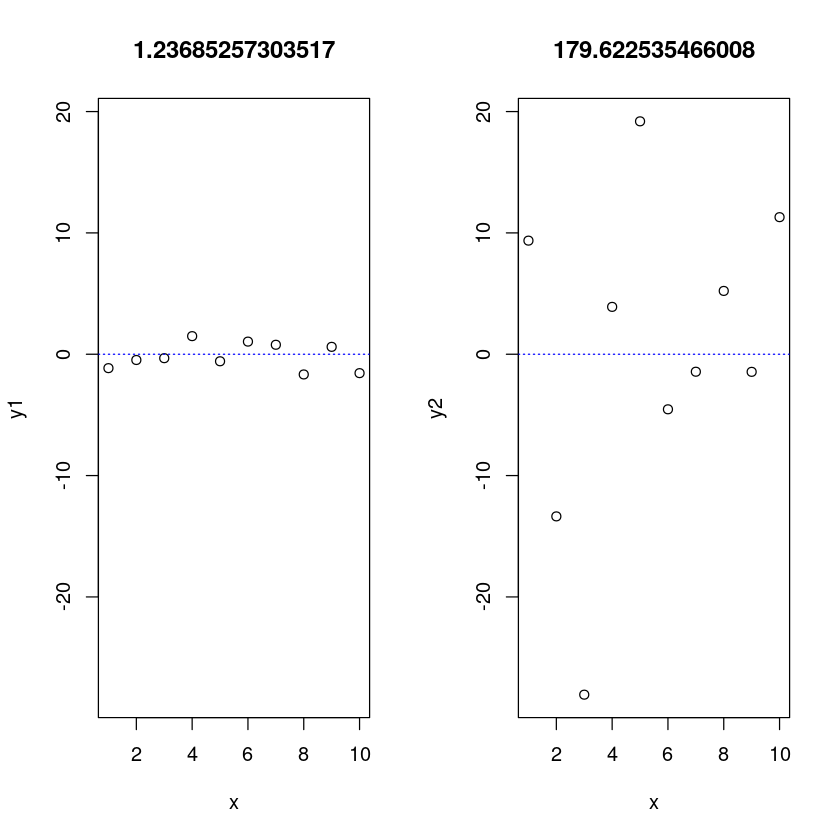

In [113]:
source("stat_functions.R") # intuitive example of variance: 
example_variance() # high and low variance 

- **Standard deviation** measures spread of a population around the mean, $s$. Calculated as the square root of average variance from the mean. 
$$
s = \sqrt{\frac{\Sigma^n_{i=1}(\bar{x}-x_i)^2}{n-1}} = \sqrt{\bar{\sigma^2}}
$$
- In above two equations we are dividing by the **degrees of freedom**: The sample size, n, minus total statistical parameters estimated from the dataset (1, the mean). 
    - Generally df calculated as the total number of values minus the numbr of parameters estimated. 
    
Mean and sd are mainly meaningful when dealing with normal/gaussian distrributions. In fact, much of stats assumes a normally distributed data- usually in the residuals (from a line of best fit). Data can be **z-transformed** so they follow a standard normal distribution (mean of zero, sd of 1):
$$
z_i = \frac{y-\bar{y}}{\sigma_y}
$$

**Quantiles** describe different subsets of a distribution. 

**Confidence Intervals** are the range ofvalues a given percentage of the population is likely to reside. Often used is **95% Confidence Interval**, or the range of values that encompass 95% of the statistical population. 
- In standard normal, the 95% CI lies between 1.96 and -1.96.
$$
CI = \bar{x} \pm z\frac{sd}{\sqrt{n}}
$$
$z$ = confidence level value, ie. 1.96- or whatever the value is in normal distribution.

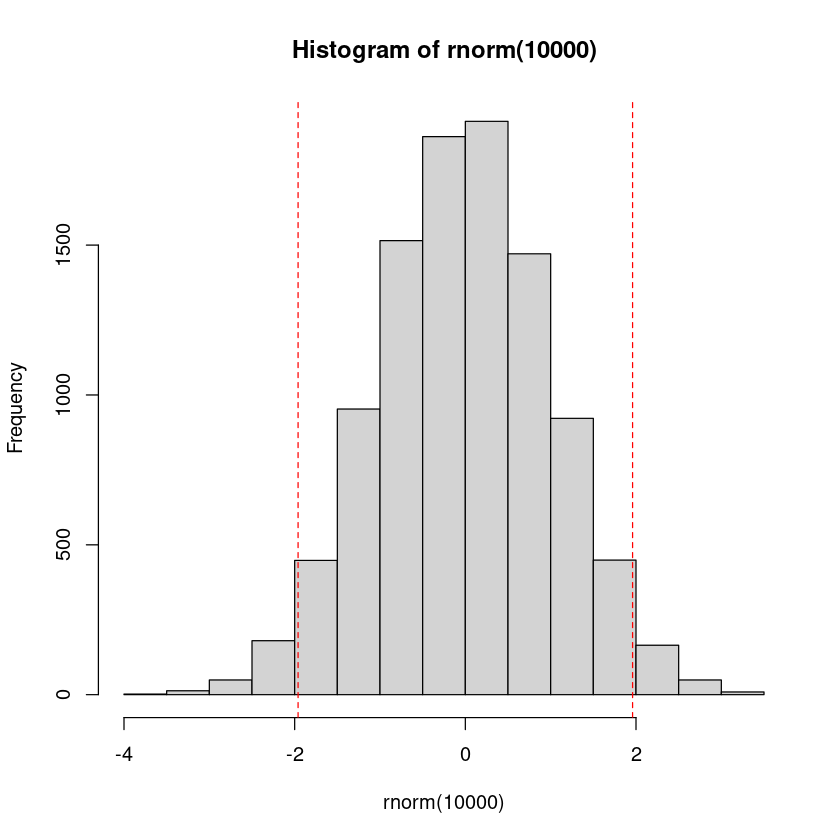

In [112]:
hist(rnorm(10000))
abline(v=c(1.96,-1.96), lty=2, col="red")

In [75]:
require(tidyverse)

Loading required package: tidyverse

── Attaching packages ──────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Finding statistical distribution
First step in analysing new data is to try and find out its distribution. Firstly, want to identify what kind of data you have (continuous, discrete, categorical, boolean, percentage), and visualise it by plotting. Let's look as study of dragon flies and damsel flies.
    - Below can see data has three factors (suborder, family, species), and lots of continuous data.

In [117]:
genome <- read.csv("~/Documents/TheMulQuaBio/content/data/GenomeSize.csv", stringsAsFactors=T)
head(genome)

,Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
2,Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
3,Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
4,Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
5,Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
6,Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


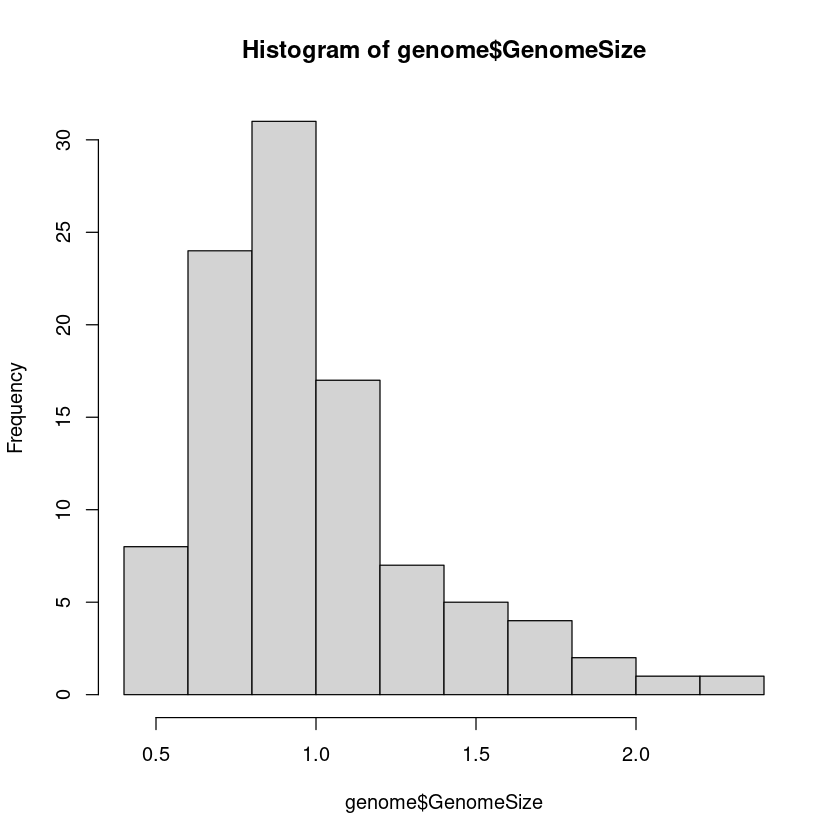

In [35]:
hist(genome$GenomeSize, breaks=10) # looks a little skewed.

In R, ~ symbol means "as a function of" and can be used to easily see how the response variable varies as a function of a given explanatory variable. Let's analyse this skew in terms of one of the factors given.

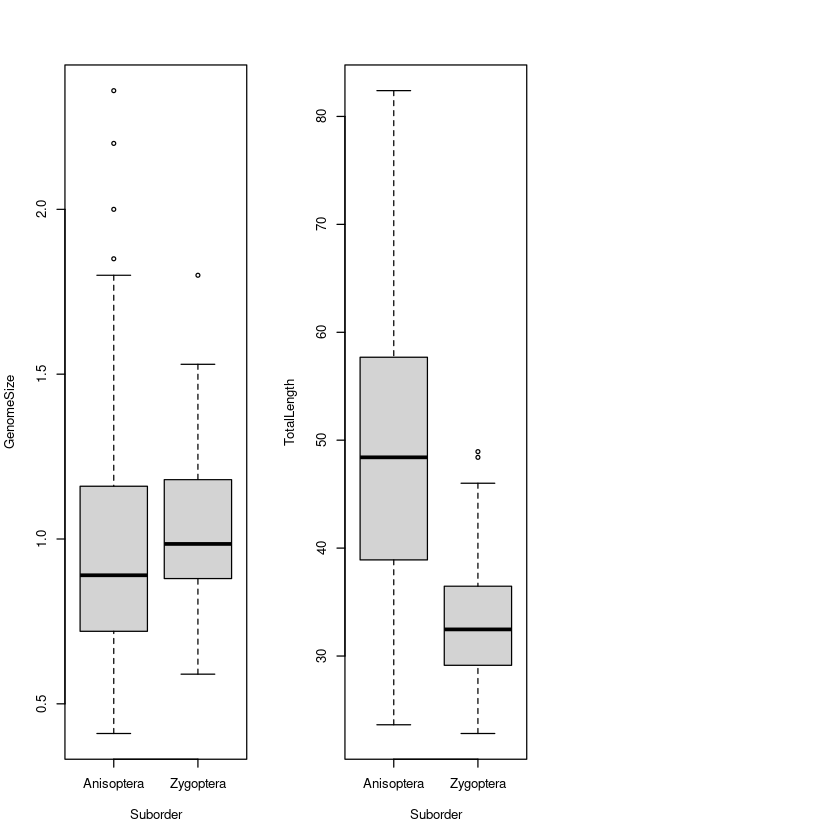

In [39]:
par(mfrow=c(1,3))
plot(GenomeSize~Suborder, data=genome)
plot(TotalLength ~Suborder, data=genome) # two different sizes, might have different relationships

# 02 Hypothesis Testing
## T-tests
Used to find if there is a *significant difference between two (and only two) values*
- Commonly used to find if there is a difference between two sample means (ie. are two population means different?), or the difference of some mean agaisnt a reference value or null. 
    - Importantly, t-tests can only be used to compare between two values, otherwise inflates change of falsely rejecting the null hypothesis (type 1 error) as number of pairwise comparisons increases. 
T value calculated as the difference between two values divided by how much uncertainty there is about the size of that difference. 
$$
t= \frac{x_1-x_2}{se}
$$

Here *uncertainty* is measured using **Standard Error**- how much a sample population/mean deviates from the actual mean of the population. 
- sd is distribution of sample data, meanwhile se is the theoretical distribution of sample means. 
$$
se = \frac{sd}{\sqrt{n}}
$$
- Thus se, and uncertainly directly related to sample size. The larger the sample, the lower the SE. 

t-distributions fall normally, where t=0 means there is *no difference* between the two values. 
- Thus more extreme t values, ie. the further from zero t is, the greater the difference between values. 
- Lastly, following normal distribution, the *p-value* is the probability that your t-value was discovered at random. Ie. the y-axis. 
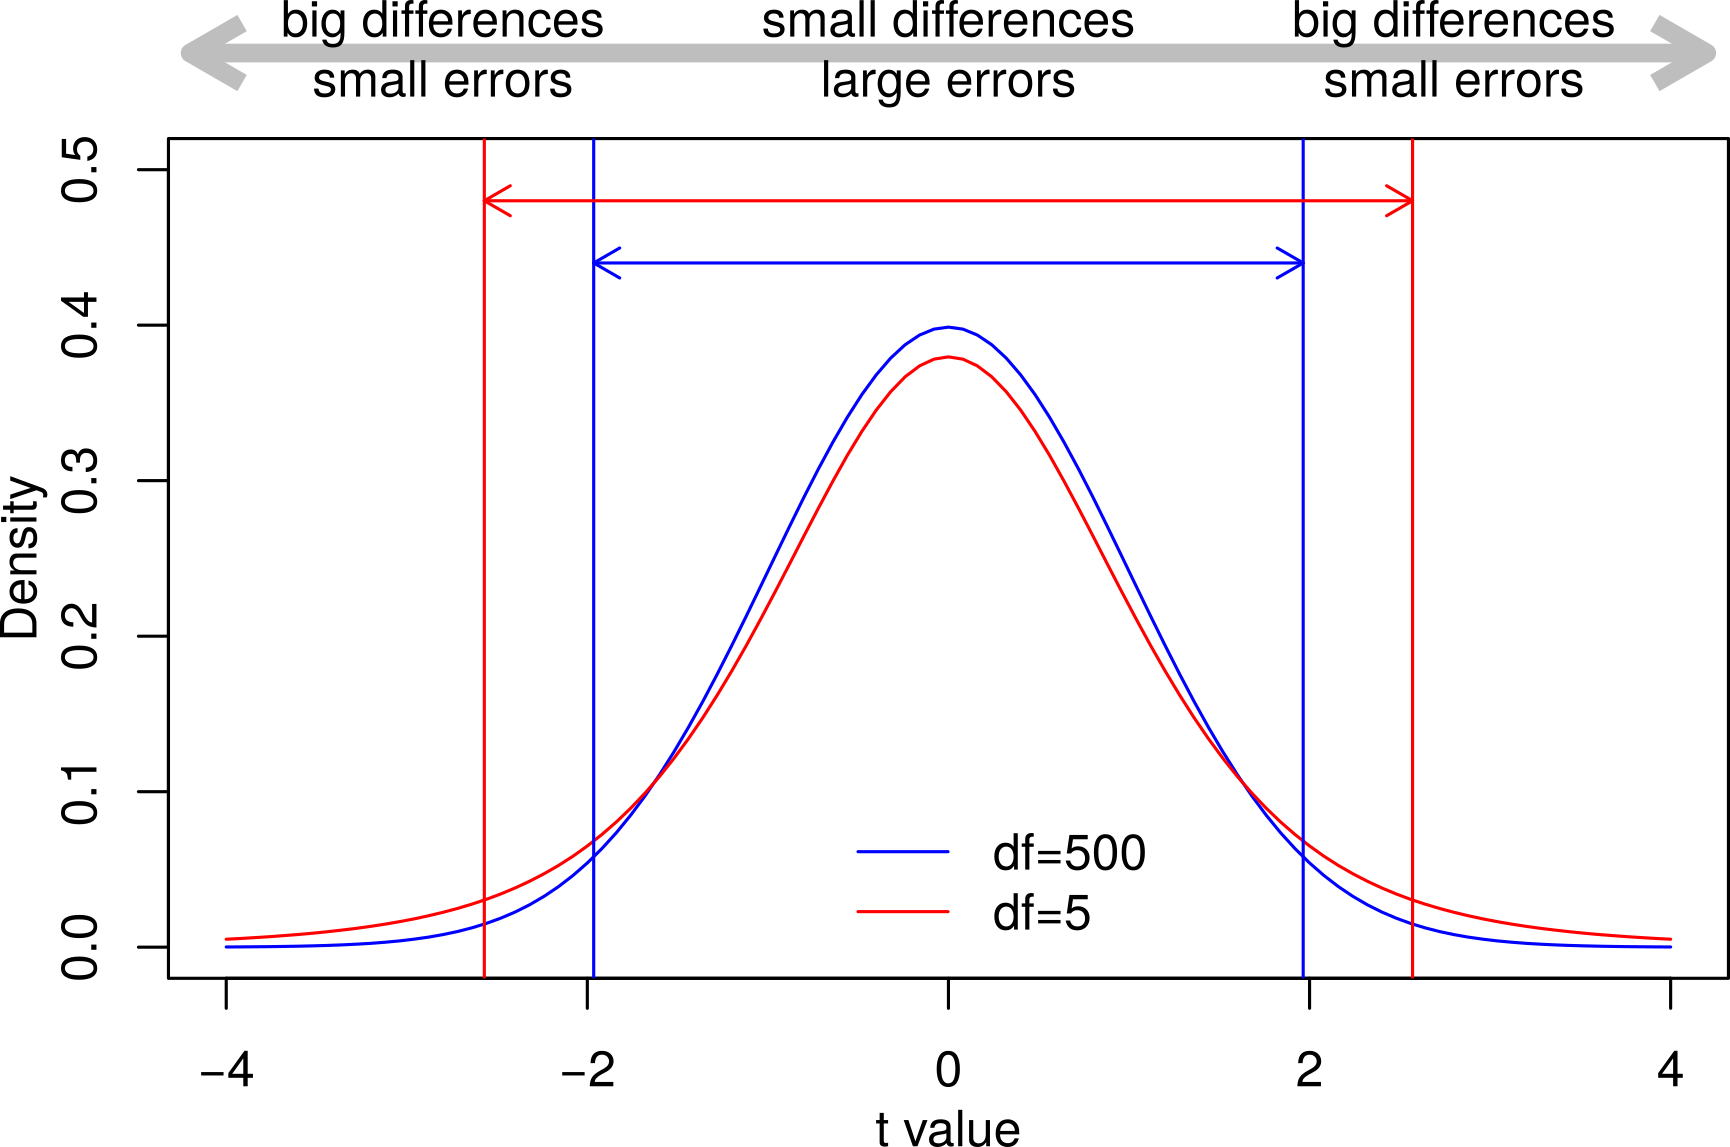

### One-way $t$ tests
T-tests can be one-way (compare a mean to a fixed value), or two ways (compare two means). In one-way t-tests, we compare a mean to a given *known* value (ex: null), thus, the only uncertainty comes from the mean value in question.

In [40]:
# Ex: is mean genome size of Odonata smaller than the average for insects (1.25)?
t.test(genome$GenomeSize, mu=1.25)


	One Sample t-test

data:  genome$GenomeSize
t = -6.3062, df = 99, p-value = 8.034e-09
alternative hypothesis: true mean is not equal to 1.25
95 percent confidence interval:
 0.9401377 1.0884623
sample estimates:
mean of x 
   1.0143 


- This is a very big t-value, so we can conclude the mean genome size of Odanata is significantly different from other insects. 
    - df is the number of samples minus estimated parameters (1, mean). 
- Output also gives us confidence intervals for the mean. These can also be calculated by multiplying the 95% intervals of tdistrbution by standard error of the data, and adding it to the mean.

The mean genome size of Odanata is significantly different from 1.24, the mean genome size of insects (mean=1.014, se=0.037, df=99,t=-6.3, p=8.034e-09)

In [81]:
# Find 95% CI
se <- sd(genome$GenomeSize)/sqrt(length(genome$GenomeSize))
CI <- c(-1.96, 1.96)*se + mean(genome$GenomeSize)
CI

[1] 0.9410428 1.0875572

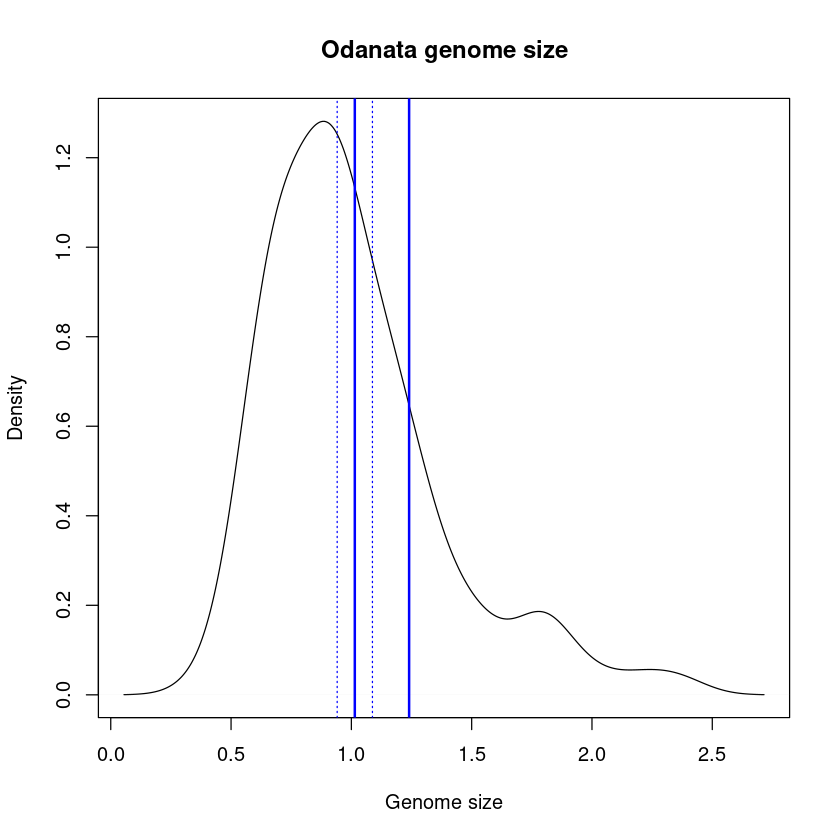

In [71]:
plot(density(genome$GenomeSize), main = "Odanata genome size", xlab="Genome size")
abline(v=CI, col="blue", lty=3, lwd=1)
abline(v=mean(genome$GenomeSize), col="blue", lwd=2)
abline(v=1.24, col="blue", lwd=2) # insect mean lies outside of 95% CI of odanata mean
# Can accept they are significantly different. 

### Two-way t tests
Used when comparing the means of two samples, where *both* means contain error. This means there is greater uncertainty involved in either value, thus harder to be confident there is a significant difference (see the plot below). 
- Calculated by using the standard error of both samples:
$$
se_{a-b}=\sqrt{\frac{var(a)}{n_a}+\frac{var(b)}{n_b}}
$$

Let's look at the difference between Anisoptera and Zygoptera:

In [74]:
t.test(GenomeSize~Suborder, data=genome)


	Welch Two Sample t-test

data:  GenomeSize by Suborder
t = -0.095891, df = 97.997, p-value = 0.9238
alternative hypothesis: true difference in means between group Anisoptera and group Zygoptera is not equal to 0
95 percent confidence interval:
 -0.1442041  0.1309104
sample estimates:
mean in group Anisoptera  mean in group Zygoptera 
                1.011774                 1.018421 


Shows there is *no significant difference* between genome size of the two(mean anisoptera=1.01, mean zygoptera = 1.018, se=0.069, df=98, t=-0.095, p=0.92)
- 92% chance any differences were just found at random.
- Here CI is the 95% confidence interval around the observed difference in means of the two samples. Since 0 is included in this CI, any difference is essentially not distinguishable from zero. 

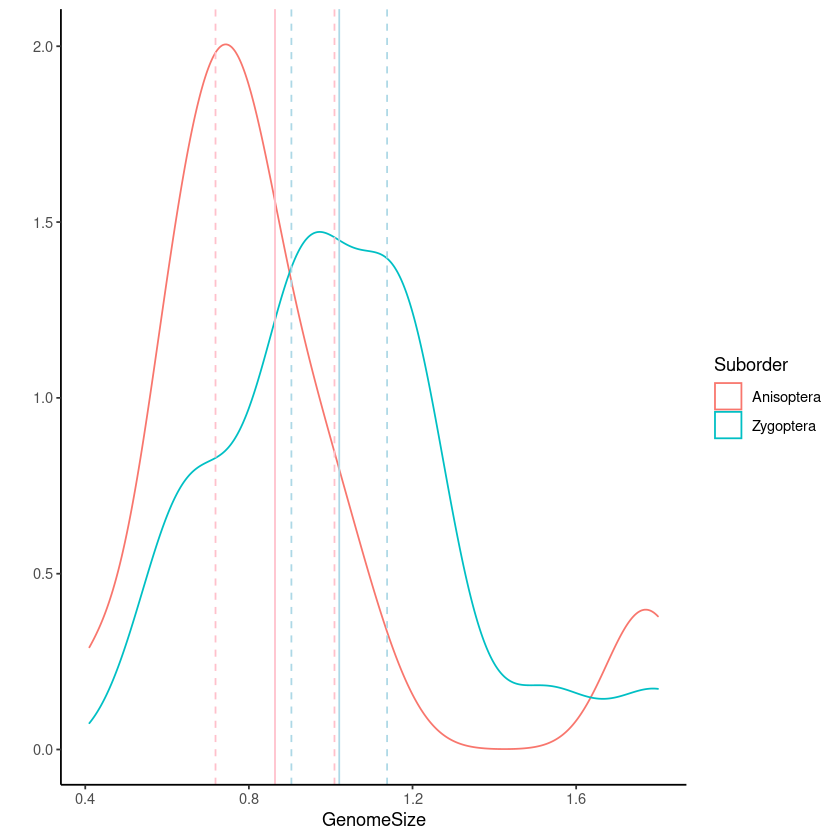

In [111]:
source("stat_functions.R")
anisoptera <- filter(genome, Suborder=="Anisoptera")
zygoptera <- filter(genome, Suborder=="Zygoptera")
qplot(GenomeSize, data=genome, colour=Suborder, geom="density") + 
geom_vline(xintercept=mean(anisoptera$GenomeSize), colour=I("pink")) + 
geom_vline(xintercept = get_CI(anisoptera$GenomeSize), colour = I("pink"), linetype="dashed") + 
geom_vline(xintercept=mean(zygoptera$GenomeSize), colour = I("lightblue")) + 
geom_vline(xintercept=get_CI(zygoptera$GenomeSize), colour = I("lightblue"), linetype="dashed") +
theme_classic() # Great overlap in CI

*NOTE*- Two-sample t tests also assume that both samples are *normally distributed*, thus mean is a good measure of central tendency, and that the two populations have similar variance.

## The F test
Used to compare *variance* of two samples or populations. F value is simply the ratio of variances from sample a and b, where F=1 means the two populations are identical. 
- F < 1, var(a) is greater than var(b)
- F > 1, var(b) is greater than var(a)
$$
F=\frac{var(a)}{var(b)}
$$

F-distribution slightly skewed. 95% CI is 0.482 < F < 2.074: ie. between these values they are likely to have the same variance. 

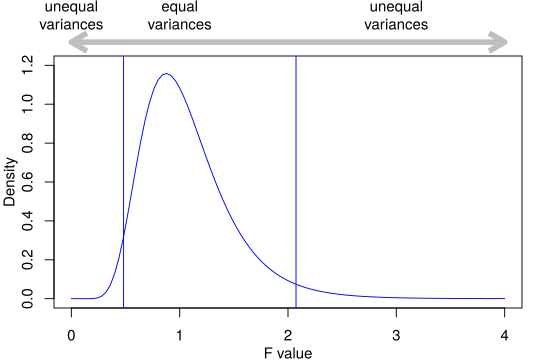


Let's use F test to test critical assumption of the above T-test, that anisoptera and zygoptera have more or less equal variances.

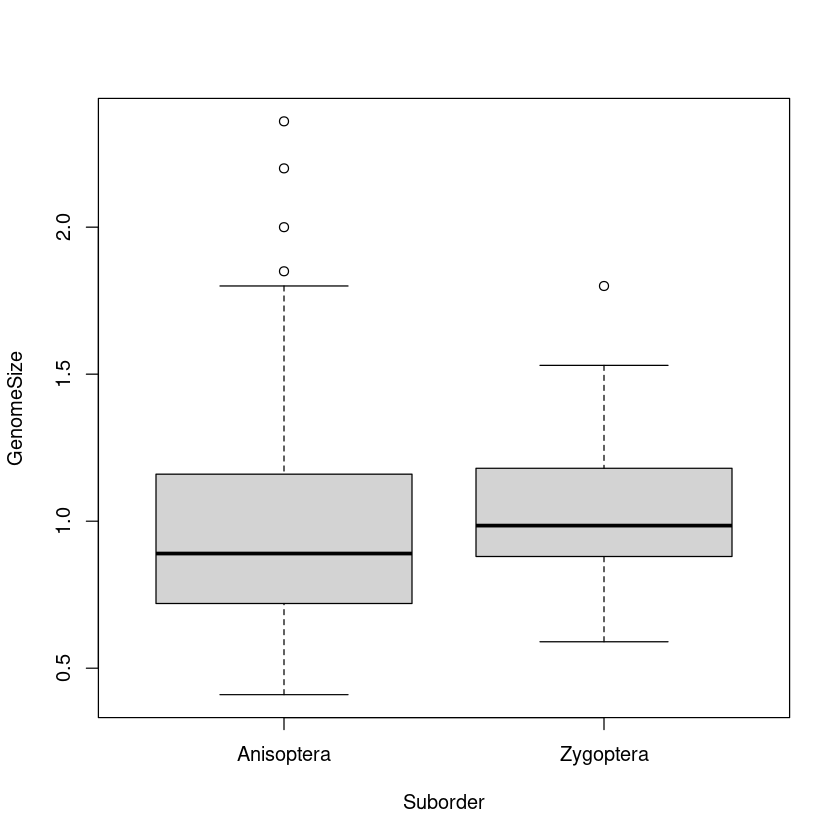

In [119]:
boxplot(GenomeSize~Suborder, genome) # longer boxes mean more variation. 

In [118]:
var.test(GenomeSize~Suborder, data=genome)


	F test to compare two variances

data:  GenomeSize by Suborder
F = 2.6574, num df = 61, denom df = 37, p-value = 0.001946
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.449330 4.670705
sample estimates:
ratio of variances 
           2.65741 


- The F value above is quite large. P value tells us if samples were drawn from populations with the same variance, an F value this extreme would only be observed 1/500 times- ie. Variances are significantly different.
    - So how do we deal with this in our T-tests? Note above, the t.test function returned df=60.503, where we would expect 98 (n-2 parameters(2 means)). This is because R automatically applies a penalty to the degrees of freedom to account for differences in variance. 
    - In some cases, we can also transform data to make variance more equal. For example, z-transformations or logtransformations (turn skewed data into more normally distributed data).

### Summary
**T-test**: Used to calculate significant difference between two terms.

**F-test**: Compares variance of two sample populations. 

### Effect Size
How different two groups are. Gives a value of $D$, (cohen's D): Ex: How difference between a control group and test group. 
$$
D = \frac{Mean_1 - Mean_2}{sd}
$$
- where d gives how many standard deviations the groups differ by. Ex: d=1, differ by 1 standard deviation etc.

# 02 Linear Models
## Linear Regression
A class of linear models that is a good choice when both your response and explanatory variables are continuous, and if they have some continuous relationship. 
- Start by plotting all parwise relationships using pairs(data) in R, and see where you can find linear relationships. 

**Correlation Coefficient** is one way of summarising how strong a pair-wise relationship is between any two variables. 
$$
r_{xy}=\frac{\Sigma^n_{i=1}(\frac{x_i-\bar{x}}{s_x})(\frac{y_i-\bar{y}}{s_y}}{n-1}
$$
- $r_{xy}$ = correlation coefficient of x and y
- and the two quantities in paraenthesis on top are the z-scores of x and y.

In [124]:
# Correlation of a matrix
cor(genome[,c(4,7,8,12,14)], use="pairwise")
# Pairwise tells R to omit observations with missing data and only use complete pairs

,GenomeSize,BodyWeight,TotalLength,ForewingLength,ForewingArea
GenomeSize,1.0000000,0.3430934,0.3407077,0.2544432,0.3107247
BodyWeight,0.3430934,1.0000000,0.9167995,0.8944228,0.9198821
TotalLength,0.3407077,0.9167995,1.0000000,0.9225974,0.9077555
ForewingLength,0.2544432,0.8944228,0.9225974,1.0000000,0.9829803
ForewingArea,0.3107247,0.9198821,0.9077555,0.9829803,1.0000000


In [125]:
# Correlation of two values
cor.test(genome$GenomeSize, genome$TotalLength, use="pairwise")


	Pearson's product-moment correlation

data:  genome$GenomeSize and genome$TotalLength
t = 3.5507, df = 96, p-value = 0.0005972
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1526035 0.5049895
sample estimates:
      cor 
0.3407077 


Correlation coefficient assumes a *straight linear relationship*, for instances of curves (such as between different body parts) we can log-transform the power law $y=ax^b$ to get a linear relationship
$$
log(y)=log(a)+blog(x)
$$

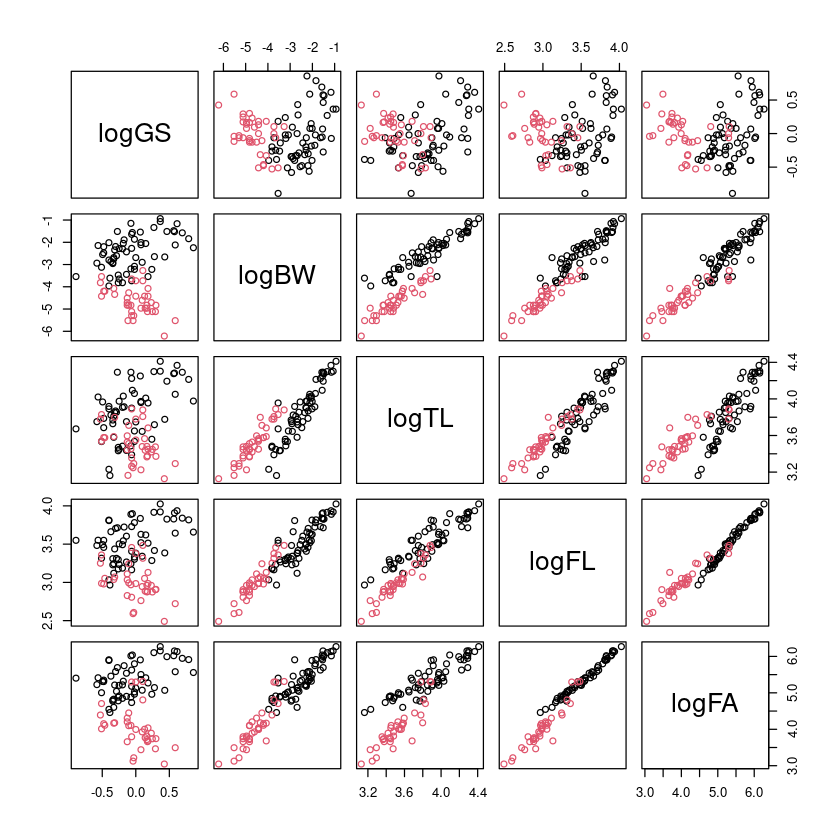

In [127]:
genome$logGS <- log(genome$GenomeSize)
genome$logGS <- log(genome$GenomeSize)
genome$logBW <- log(genome$BodyWeight)
genome$logTL <- log(genome$TotalLength)
genome$logFL <- log(genome$ForewingLength)
genome$logFA <- log(genome$ForewingArea)
logmorpho <- c(17,18,19,20,21)
pairs(genome[, logmorpho], col=genome$Suborder) # relationships now look linear

### Fitting a linear regression
Does log genome size explain logbody weight? In plotting the two by Anisoptera and Zygoptera, it's clear there are two different relationships. Going to consider them individually.
- Can use lm() in R: y~x

In [128]:
model <- lm(logBW ~ logGS, data=genome, subset= Suborder == "Anisoptera")

In [129]:
coef(model)

(Intercept)       logGS 
  -2.399471    1.005220

In [130]:
summary(model)


Call:
lm(formula = logBW ~ logGS, data = genome, subset = Suborder == 
    "Anisoptera")

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.6124  0.0970  0.5194  1.3236 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.39947    0.09085 -26.413  < 2e-16 ***
logGS        1.00522    0.23975   4.193 9.54e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6966 on 58 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2326,	Adjusted R-squared:  0.2194 
F-statistic: 17.58 on 1 and 58 DF,  p-value: 9.539e-05


- Coefficient table gives one estimate for each coefficient (slope and intercept in linear regression). Each row has a t test of whether the values are significantly different from zero (whether no relationship would better describe the two values). As well as their standard error (uncertainty). 
    - Both coefficients are significant in this case
    - *NOTE* the stars *** on the last column indicate whether/how significant a parameter estimate is!
    
Slope is calculated as the correlation coefficient times the ratio of standard deviations of each x and y. Thus the regression slope is proportional to corr, and the sd serve to scale it to the appropriate units of measurement. 
$$
slope = r_{xy}\frac{s_y}{s_x}
$$
- Also gives an $r^2$ value, and conducts an F test (F-statistic)
- **Residual standard error**: (standard error of the model) calculated as the square root of sum of squared residuals divided by n-2 (estimated two parameters- slope and intercept)

*Main takeaway*: the standard errors of the coefficients are directly proportional to the standard errorr of the regression, and inversely proportional to quare root of the sample size. 

### ANOVA on a fitted model
Anova is a linear model in its own right, but can be used in linear regression to assess how much variation in y is explained by x (how well our model explains variance of y). 
- Looks to total variance in y, and what proportion of it is explained by x. 

**Method in essense**
1. Calculated residual sum of squares for the model and a null model (zero relationship), and substracts SS of the model from SS of the null to see *how much more* variance is explained by the model (how much the model reduces RSS)
    - This gives us the *explained* sum of squares (ESS)

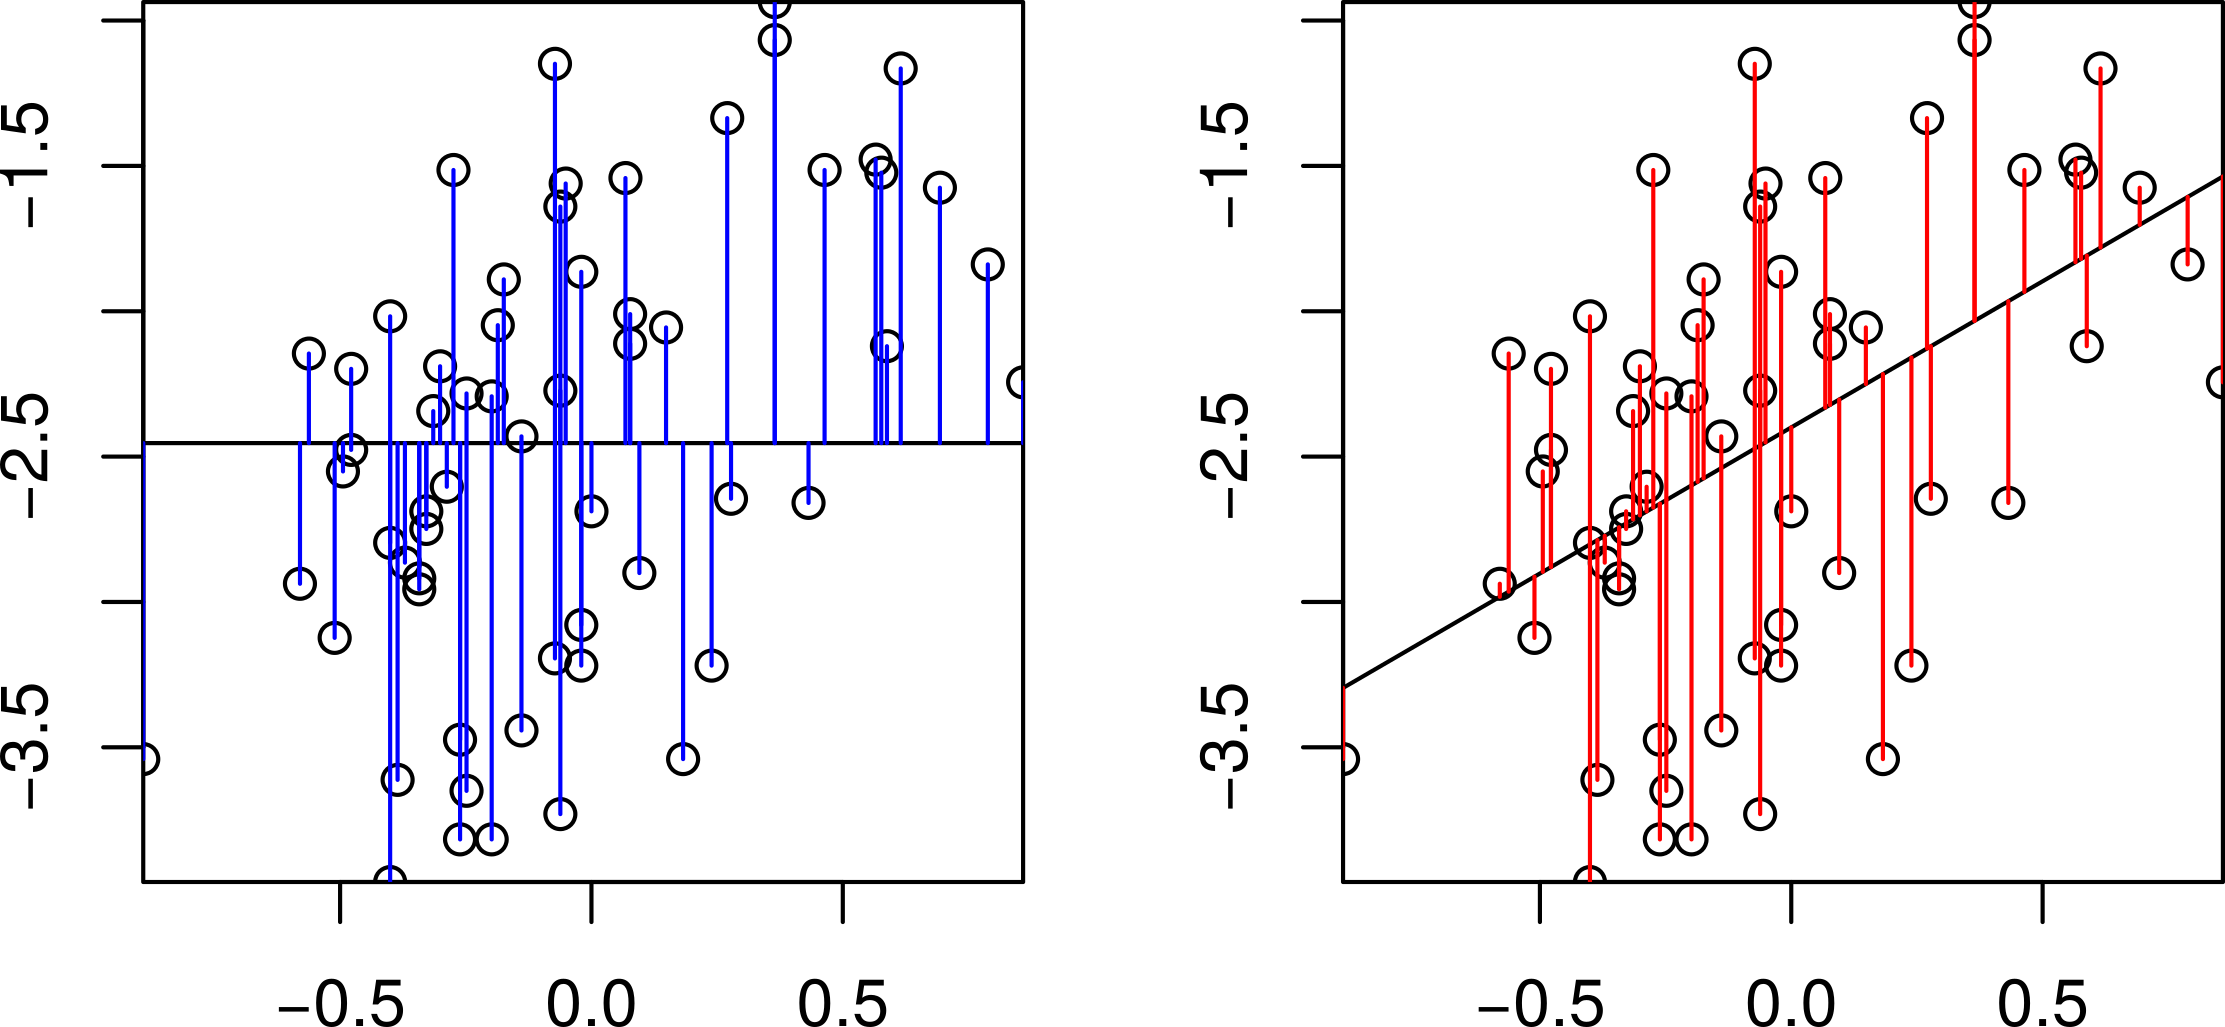

2. Then conduct an F-test to see if there's significant difference between variation explained by the model (ESS) and residual variance (RSS- variance not explained by the model. 

In [131]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logGS,1,8.52939,8.5293897,17.57907,9.538946e-05
Residuals,58,28.14168,0.4852014,NA,NA


- Above, each coefficient (slope only here) takes up 1df, then the residuals take n-nparameters df. (In this case 60-2, since the model has two parameters- intercept and slope). 
- Sum of squares describes variation explained by the model (top) and not explained by the model (bottom). Mean sum of squares is just these values divided by their degrees of freedom. 
- F value is the ratio of Mean ESS/ mean RSS, and a p-value for it. 
In this case, it's clear genome size exlains a significant variation in body weight. 
- Can get the sum of squared residuals in R using resid() of the model. 

### Model diagnostics
Once we have our model and we are happy with it, we can add it to our plot. Lastly, we can check how appropriate our model is to our data by plotting it.

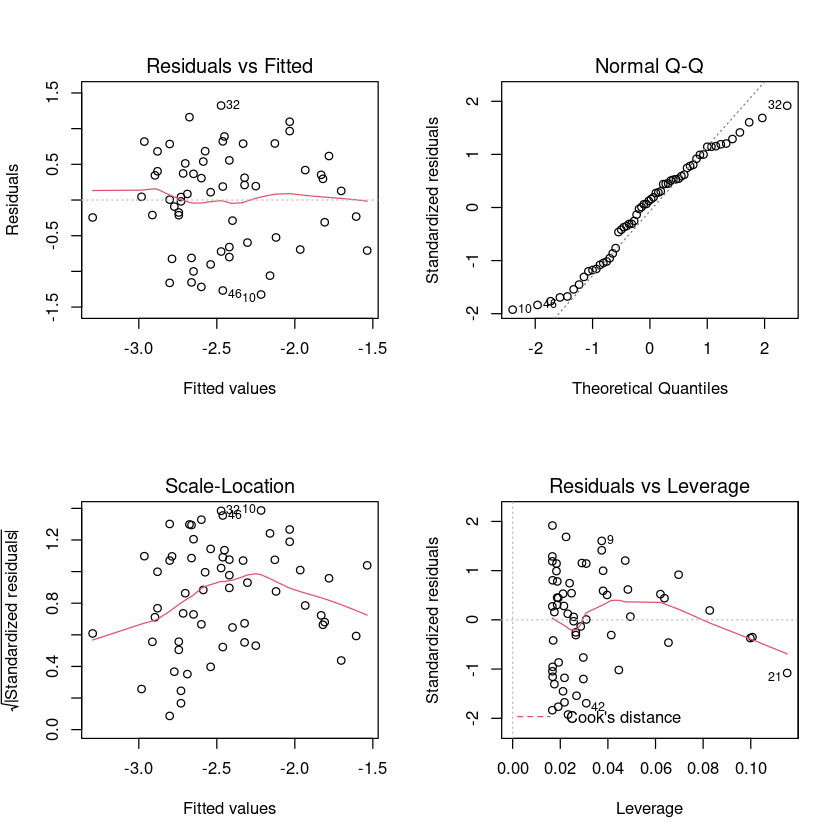

In [132]:
par(mfrow=c(2,2))
plot(model)

- **Residuals vs. Fitted**: Looks at distribution of residuals across fitted line. Want no clear patterns in residuals, a "starry sky"
- **Normal Q-Q**: Sees that residuals are normally distributed. Want points to more or less organise along line. 
- **Scale location** same as first plot but with squared residual values to appreciate large/small residual points. 
- **Residuals vs leverage** Shows the infleunce of each residual point on coef estimates. Want them to organise symmetrically above and below line (equal pull in both directions)
    - dotted lines = cook's distance, show much much a model would change is a single impactful residual was changed. 

## Analysis of Variance
Anova a linear model to be used when response is continuous while explanatory variable is categorical. 
- Tests if given explanatory factors can explain variation in your response data by testing variation agaisnt a null model where no groups are present. 
    - Tests does a model with at least two categorical predictors (groups) explain variance better than one without any groups. 

Partitions data into three groups: 
1. **TSS**: total variation in observed y from observed mean y. 
    $$
    \Sigma(y_i-\bar{y})^2
    $$
    - *df*: n-1 (1 parameter, $\bar{y}$
2. **ESS**: total variance *in* the model. Ie. predicted y minus mean y. 
    $$
    \Sigma(\hat{y_i}-\bar{y})^2
    $$
    - *df*- number of coefficients minus 1 (nc-1)
3. **RSS**: total variance between observed y and predicted y. ie. how much variance is not explained by model. 
    $$
    \Sigma(\hat{y_i}-y_i)^2
    $$
    - *df*: total sample size n minus number of coefficients. (n-1)

Where mean for each is the value divided by their df. 

**F-value** is used to describe *model fit*: How much variance is explained by the groups vs. not explained
$$
F=\frac{mean(ESS)}{mean(RSS)}
$$
- If groups are significant, we would expect more variation between groups (ESS) than within them (RSS). Ie. groups vary from eachother more than points vary within groups. 

**R-squared** is the proportion of variation explained by the model out of total variance in y.
$$
R^2=\frac{ESS}{RSS}
$$
- R-squared value can be interpreted as what percentage of variation is explained by the explanatory variables (ie. the model)
- Many R packages will use an *adjusted R squared* that penalises oerspecification (ie. too many parameters/overfitting of data). This adjustment makes it favour fewer parameters that explain greater variance (as opposed to introducing lots of parameters that only explain a small amount of variance each and overcomplicate the model

ANOVA calculates variation between groups, but not *pairwise* variation. For this can use Tukey HSD, though it is harder to get significant results with such pairwise calculations.

### One-way Anova
Tests one factor/independent variable. Example, the effect of trophic level on genome size. 

In [133]:
## Example: Life history of mammals
mammals <- read.csv("~/Documents/TheMulQuaBio/content/data/MammalData.csv", stringsAsFactors=T)
head(mammals)

,Binomial,meanCvalue,Order,AdultBodyMass_g,DietBreadth,HabitatBreadth,LitterSize,GroundDwelling,TrophicLevel
,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>
1,Acinonyx jubatus,2.56,Carnivora,50500.0,1,1,2.99,Yes,Carnivore
2,Acomys cahirinus,2.64,Rodentia,41.2,NA,NA,2.43,NA,NA
3,Aconaemys fuscus,3.75,Rodentia,130.0,2,2,3.07,Yes,Herbivore
4,Aconaemys sagei,3.70,Rodentia,96.5,NA,2,NA,Yes,NA
5,Addax nasomaculatus,3.98,Artiodactyla,94700.0,5,1,1.00,Yes,Herbivore
6,Aepyceros melampus,4.69,Artiodactyla,52300.0,2,1,1.00,Yes,Herbivore


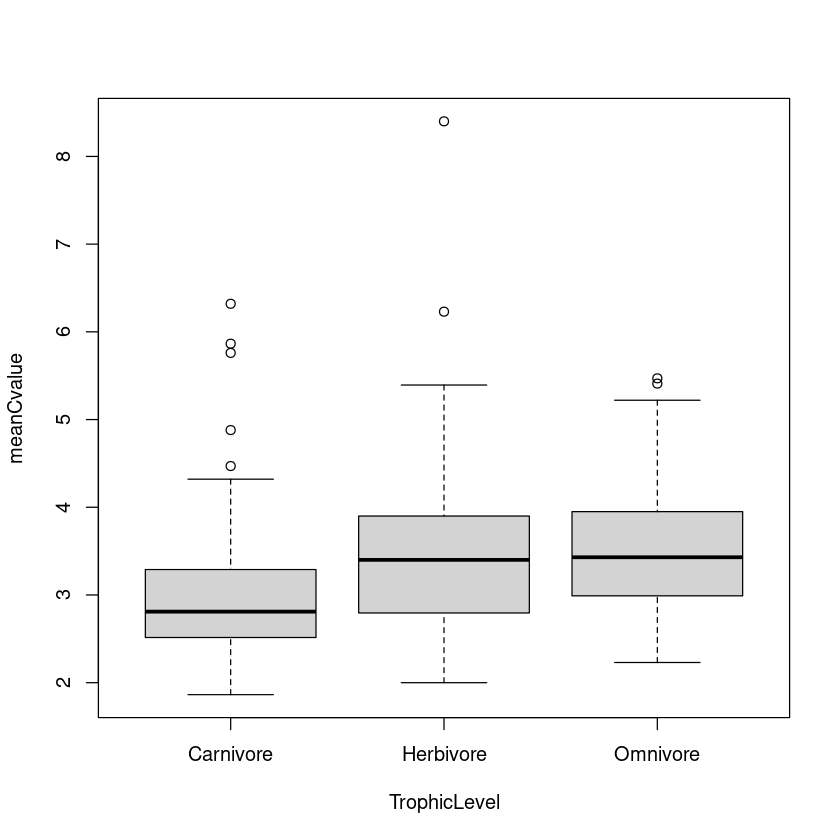

In [135]:
# Does the mean C value (genome size) predict different trophic levels?
# Omnivore, carnivore, herivore
plot(meanCvalue ~ TrophicLevel, data=mammals) # Data slightly skewed above the mean
# log transform 
mammals$logCvalue <- log(mammals$meanCvalue)

In [172]:
# 1. Are these three means significantly different? 
trophicLM <- lm(logCvalue~TrophicLevel, data=mammals)
anova(trophicLM) # one way anova 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TrophicLevel,2,0.8268678,0.41343388,7.220365,0.0008657029
Residuals,300,17.1778247,0.05725942,NA,NA


The F-value is quite high, so Trophic level does seem to explain some significant variance in the data (a model that splits animals into their trophic level is slightly more explanatory than a null model that doesnt)
- However, looking to the sum of squares- only 0.83 squared residuals are explained by trophic level. Divided by total sum of squares (ESS+RSS=18),
$$
R^2=\frac{ESS}{TSS}=\frac{0.83}{18}$\approx$ 0.046
$$
- Only explains 4.6% of variance in log genome size. So while the model is significant, it's not very explanatory. 

After conducting the ANOVA, can also look at the influence/differences between factors: 

In [137]:
summary(trophicLM) # lets look at modelled coefficients


Call:
lm(formula = logCvalue ~ TrophicLevel, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50378 -0.16350 -0.00379  0.15114  0.93130 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.08507    0.03351  32.383  < 2e-16 ***
TrophicLevelHerbivore  0.11186    0.03958   2.826 0.005027 ** 
TrophicLevelOmnivore   0.15128    0.03985   3.796 0.000178 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2393 on 300 degrees of freedom
  (76 observations deleted due to missingness)
Multiple R-squared:  0.04593,	Adjusted R-squared:  0.03956 
F-statistic:  7.22 on 2 and 300 DF,  p-value: 0.0008657


Above coefficients:
- See carnivore genome size is the intercept, and it is signficiantly different from zero (unsurprising)
- The other two coefficients show difference from intercept. Both values are signficiantly different from the intercept (from carnivore genome size) and larger than the intercept
- Also shows R-squared and adjusted R squared to account for the number of variables included. 

Equation that estimates carnivores is just the intercept then. Herbivores/Omnivores is intercept + coef*x. 

### Testing pairwise differences
Above model doesn't tell us if there is a significant difference between genome size of herbivores and omnivores- both compared to carnivores. Can do a pairwise test using **Tukey's Honest Signiciant Difference** test

In [138]:
TukeyTroph <- TukeyHSD(aov(trophicLM))
print(TukeyTroph)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = trophicLM)

$TrophicLevel
                          diff         lwr       upr     p adj
Herbivore-Carnivore 0.11186136  0.01863354 0.2050892 0.0138881
Omnivore-Carnivore  0.15128061  0.05741074 0.2451505 0.0005208
Omnivore-Herbivore  0.03941925 -0.03161080 0.1104493 0.3922731



- Table shows pair-wise differences between means as well as their upper and lower CI. 
    - if 0 is included in the confidence intervals, then difference is not significant. 
    - No significant difference between omnivores and herbivores. 
- Note also all the p-values here are larger than in the ANOVA, this is because of the way uncertainty is inflated when comparing pairwise differences.

### Two-way ANOVA
While one way ANOVA tests if a single factor (ex: trophic level) explains significant variance in data, two-way ANOVA can be used to compare how much variance is explained by multiple factors (multiple explanatory variables)
- ex: how much variance in genome size is explained by trophic level vs. whether the animal is ground-dwelling or not? 

#### Chi-Squared
Firstly, ANOVA assumes all factors are independent. 
- This is simple enough in one-way ANOVA: we know by definition there is no overlap in animals that are carnivorous and herbivorous. 
- Less clear when we are considering the variance explained by two different factors. For example, when asking about how much variance in genome size is explained by trophic level as opposed to whether the animal is ground-dwelling, it is important that carnivores are not more likely to be ground-dwelling. etc.

**Chi-square** another statistical test like t-test or wilcox test. It tests if two explanatory factors are independent by comparing the observed distribution between factors agaisnt the expected distribution if they were completely independent (randomely distributed). 
$$
\chi^2 = \frac{(Observed-Expected)^2}{Expected}
$$
- If the p-value is significant, there is a significant difference between expected random distrbution and the observed distribution (ie. they are NOT independent)

In [139]:
# First, make a table of factors
factors <- table(mammals$GroundDwelling, mammals$TrophicLevel)
print(factors)

     
      Carnivore Herbivore Omnivore
  No         26        45       64
  Yes        22        62       40


In [141]:
chisq.test(factors)


	Pearson's Chi-squared test

data:  factors
X-squared = 8.1202, df = 2, p-value = 0.01725


Here the p-vale is significant, so the factors are *not* independent. 

## Multiple Explanatory Variables
Now we will look at linear models with more than one explanatory varible.

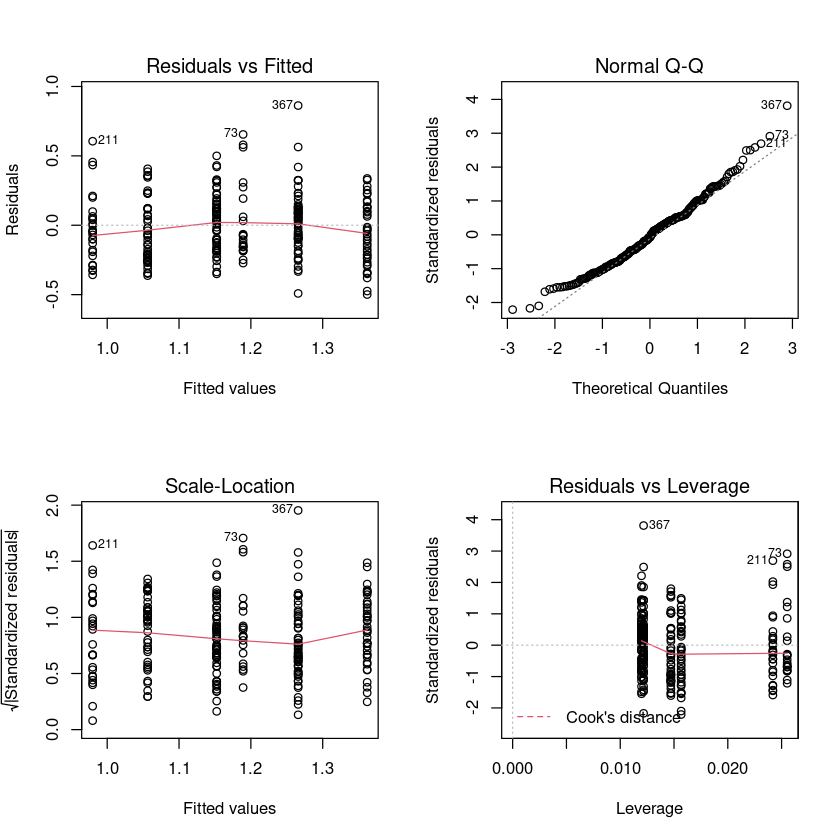

In [144]:
model <- lm(logCvalue~TrophicLevel+GroundDwelling, data=mammals)
# Check model fit
par(mfrow=c(2,2))
plot(model) # looks good

In [145]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TrophicLevel,2,0.8141063,0.40705316,7.859815,4.870855e-04
GroundDwelling,1,2.7469218,2.74692183,53.040485,4.062981e-12
Residuals,255,13.2062341,0.05178915,NA,NA


ANOVA of two factors: both factors explain significant variation. 
- Can see right away that GroundDwelling accounts for more variation in genome size than Trophic Level (ESS=2.7, r-squared=2.7/16.77=15% variance)
- Though they are both still small compared to the residual sum of squares (more variation is not explained by the model still)

- R-squared of whole model is sum of SS/TSS= 21%

We can calculate significance for the *whole model* by summing their sum squares and dividing by their summed df. (0.81+2.75/3=1.187;gives us mean SS), F value then 1.186/0.052=22.83. So the model does explain siginificantly more than the NULL. 

In [150]:
summary(model) # look at impact of coefficients


Call:
lm(formula = logCvalue ~ TrophicLevel + GroundDwelling, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49902 -0.17844 -0.01462  0.12496  0.86242 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.97976    0.03539  27.682  < 2e-16 ***
TrophicLevelHerbivore  0.07659    0.03969   1.930   0.0547 .  
TrophicLevelOmnivore   0.17269    0.03977   4.343 2.03e-05 ***
GroundDwellingYes      0.20947    0.02876   7.283 4.06e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2276 on 255 degrees of freedom
  (120 observations deleted due to missingness)
Multiple R-squared:  0.2124,	Adjusted R-squared:  0.2031 
F-statistic: 22.92 on 3 and 255 DF,  p-value: 3.602e-13


Non-groundwelling carnivores are the intercept and have smallest genome size. 
- non-groundwelling herbivores are not significantly different from intercept, meanwhile omnivorous trophic levels/being ground-dwelling have significant effects on genome size. 
    - Each introducing around 20% difference in genome size from baseline. (coef/intercept)
F-statistic same as calculated above, the model is significant. Accounts for 21% of variance in genome size ($r^2$).

Table of coefficients predicts genome size means of the four groups in the following way: 

|     | Carnivore | Herbivore | Omnivore |
|-----|-----------|-----------|----------|
|**not ground**| intercept | intercept + herbivore | intercept + omnivore|
| **ground** | intercept + ground | intercept+herbivore+ground| intercept+omnivore+ground|

### Predicted values
In R, can use function predict() to calculate predicted values from a model.

In [152]:
#1. Create df containing all explanatory variables
# use levels to get the names
gd <- rep(levels(mammals$GroundDwelling), times=3)
tl <- rep(levels(mammals$TrophicLevel), each = 2)
gd
tl

predVals <- data.frame(GroundDwelling = gd, TrophicLevel = tl)
predVals$predict <- predict(model, newdata = predVals)
print(predVals)

[1] "No"  "Yes" "No"  "Yes" "No"  "Yes"

[1] "Carnivore" "Carnivore" "Herbivore" "Herbivore" "Omnivore"  "Omnivore"

  GroundDwelling TrophicLevel   predict
1             No    Carnivore 0.9797572
2            Yes    Carnivore 1.1892226
3             No    Herbivore 1.0563447
4            Yes    Herbivore 1.2658102
5             No     Omnivore 1.1524491
6            Yes     Omnivore 1.3619145


Can then plot these mean values back onto your data to see how well they align with the sample means and CI of the observed data. If they don't quite match the expected data, it's probably because the model is missing something- likely the impact of *interaction* between variables.

## Multiple Variables in interaction
So far only looked to independent impact of variables ("main effects"), not the impact of certain variables in *combination* ("interaction effects")

**Influence of multiple variables:** $y\approx ~a+b$

**Influence of variables in interaction:** $y\approx a*b$

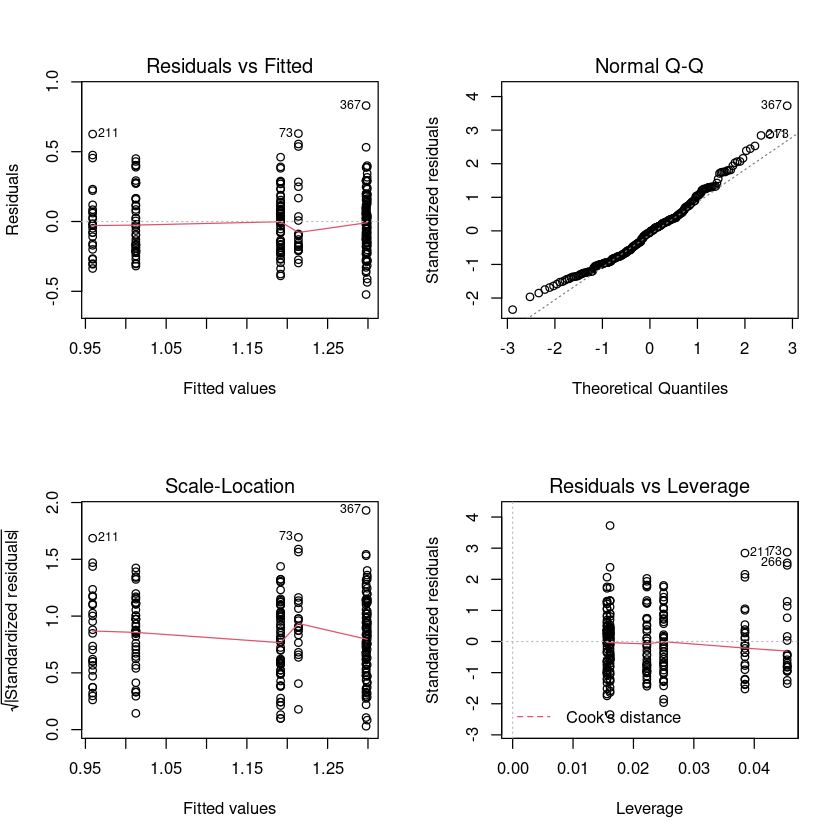

In [155]:
# Look at influence of trophic level and grounddwelling in interaction
model <- lm(logCvalue ~ TrophicLevel * GroundDwelling, data=mammals)
par(mfrow=c(2,2))
plot(model)

In [156]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TrophicLevel,2,0.8141063,0.40705316,8.061439,4.036387e-04
GroundDwelling,1,2.7469218,2.74692183,54.401106,2.335706e-12
TrophicLevel:GroundDwelling,2,0.4312875,0.21564376,4.270693,1.499280e-02
Residuals,253,12.7749466,0.05049386,NA,NA


Above table shows the variance explained by each factor, then how much variance is explained by the interaction of both factors. While there is significant variation explained by the interaction, it's not hugely explanatory. R-squared = 0.026. 
- So the model explains 2.6% more variance than previous model without interaction. 

In [158]:
summary(model)


Call:
lm(formula = logCvalue ~ TrophicLevel * GroundDwelling, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52294 -0.17069 -0.01003  0.11920  0.83057 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              0.95895    0.04407  21.760  < 2e-16
TrophicLevelHerbivore                    0.05351    0.05535   0.967 0.334605
TrophicLevelOmnivore                     0.23281    0.05226   4.455 1.26e-05
GroundDwellingYes                        0.25487    0.06509   3.915 0.000116
TrophicLevelHerbivore:GroundDwellingYes  0.03033    0.07857   0.386 0.699791
TrophicLevelOmnivore:GroundDwellingYes  -0.14761    0.07930  -1.861 0.063839
                                           
(Intercept)                             ***
TrophicLevelHerbivore                      
TrophicLevelOmnivore                    ***
GroundDwellingYes                       ***
TrophicLevelHerbivore:GroundDwellingYes    

Coef table shows 4 main effects and also introduces TWO *new* coefficients: Herbivore x Grounddewlling, omnivore x Groundwelling. 
- Only introduces two new coefficients since Carnivore x not ground dwelling captured in the intercept, and ground_dwelling + intercept it itself a main effect. 

Despite the fact that omnivore and grounddwelling independently tend to have for larger genome sizes, grounddwelling omnviores have slightly smaller than expected. Similar to ground dwelling herbivores. 
- also note despite getting an significant ANOVA (explain variation in X), in the linear regression, neither of the two coefficients is significant. 
    - There are two very weak differences in interaction that together explain significant variance in the data (recall anova tests impact of factors in interaction). 
    
If we predict mean values for this data, see that it maps perfectly onto the sample means since we've allowed for interaction. 

## ANVOCA 
Analysis of co-variance: linear model used for when there is one categorical and one or more continuous predictor variables. 
- Fits an interaction with a mixture of continuous variables and factors (sort of a blend of ANOVA and regression)

In [161]:
# ex: Body weight ~ genome size * Suborder 
# Body weight explained by genome size in interaction with suborder

odonModel <- lm(logBW ~logGS*Suborder, data=genome)
anova(odonModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logGS,1,1.144458,1.1444583,2.710007,1.030601e-01
Suborder,1,111.967748,111.9677481,265.132794,4.154783e-29
logGS:Suborder,1,9.144522,9.1445216,21.653669,1.068365e-05
Residuals,94,39.696969,0.4223082,NA,NA


- Suborder explains vast majority of information, genome size only explains a little bit. Genomesize in interaction with suborder explains a bit more. All three explain signficant variation. 

In [162]:
summary(odonModel)


Call:
lm(formula = logBW ~ logGS * Suborder, data = genome)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.3225  0.0073  0.3962  1.4976 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.39947    0.08475 -28.311  < 2e-16 ***
logGS                    1.00522    0.22367   4.494 1.99e-05 ***
SuborderZygoptera       -2.24895    0.13540 -16.610  < 2e-16 ***
logGS:SuborderZygoptera -2.14919    0.46186  -4.653 1.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6499 on 94 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7471 
F-statistic:  96.5 on 3 and 94 DF,  p-value: < 2.2e-16


- Quite a high R-sqaured value- model explains a whopping 75.5% of variation in body weight. 
- The difference account for by interaction shows how the slope for Zygoptera differs from Anisoptera:
$$
y_a = -2.40 + 1.01x
$$
- Body weight anisoptera, where x=logGS
$$
y_z = (-2.40-2.25)+(1.01-2.15)x
$$

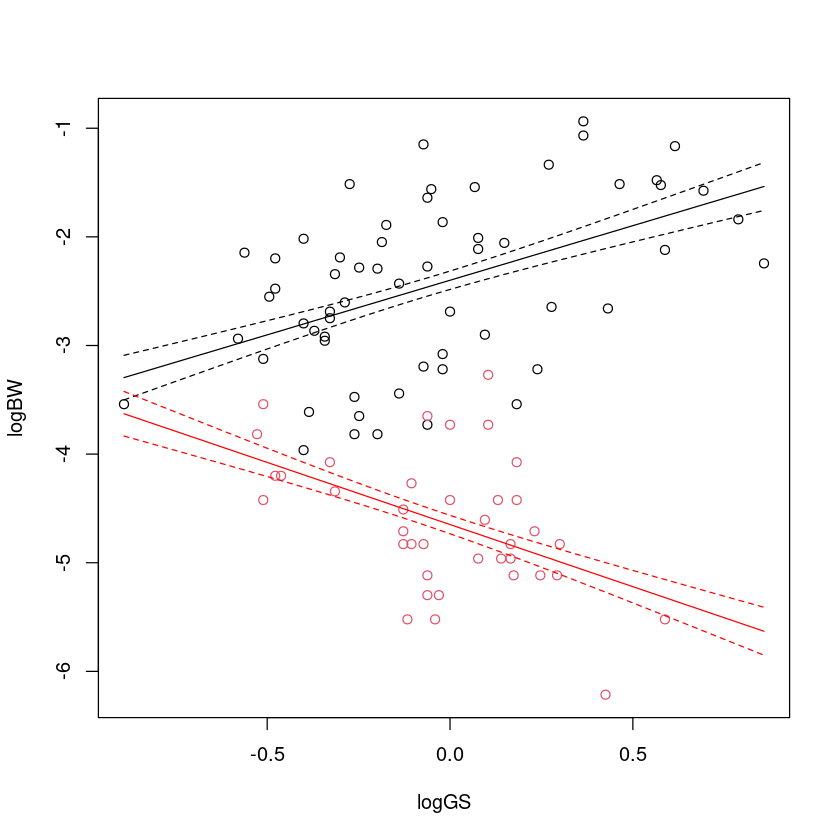

In [167]:
# Find predicted values
LogGSForFitting <- seq(min(genome$logGS), max(genome$logGS), length=100) # generate values of x to vary along

#get a data frame of new data for the order
ZygoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Zygoptera")

#get the predictions and standard error
ZygoPred <- predict(odonModel, newdata = ZygoVals, se.fit = TRUE)

#repeat for anisoptera
AnisoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Anisoptera")
AnisoPred <- predict(odonModel, newdata = AnisoVals, se.fit = TRUE)

# plot the scatterplot of the data
plot(logBW ~ logGS, data = genome, col = Suborder)
# add the predicted lines
lines(AnisoPred$fit ~ LogGSForFitting, col = "black")
lines(AnisoPred$fit + AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)
lines(AnisoPred$fit - AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)
lines(ZygoPred$fit ~ LogGSForFitting, col = "red")
lines(ZygoPred$fit + AnisoPred$se.fit ~ LogGSForFitting, col = "red", lty = 2)
lines(ZygoPred$fit - AnisoPred$se.fit ~ LogGSForFitting, col = "red", lty = 2)

## Model Simplification
Aim is to find the *minimum adequate* model. After finding a model, can use the function drop.scope(model) in R, to see which terms can be dropped. 
- After this, can do an ANOVA test between the two models to see if explanatory power is made significantly *worse* by dropping that term. If there is no significant change in explanatory power, we accept the simplied model.

In [170]:
# Ex: let's look at our interaction model from earlier
drop.scope(model) # says we can drop our interaction term. 

[1] "TrophicLevel:GroundDwelling"

In [171]:
# Next, can use upate() function to update our model, dropping the above term
model2 <- update(model, .~. - TrophicLevel:GroundDwelling) # drop term
anova(model, model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,253,12.77495,NA,NA,NA,NA
2,255,13.20623,-2,-0.4312875,4.270693,0.0149928


Tells us model 2 is *is* significantly worse for dropping this term. So we keep it in. 